1) Деректер өлшемі (shape): (891, 15)

Бағандар (columns):
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Әр бағандағы бос мәндер саны:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



2) age және fare статистикасы:


,age,fare
mean,29.699118,32.204208
min,0.420000,0.000000
max,80.000000,512.329200
std,14.526497,49.693429


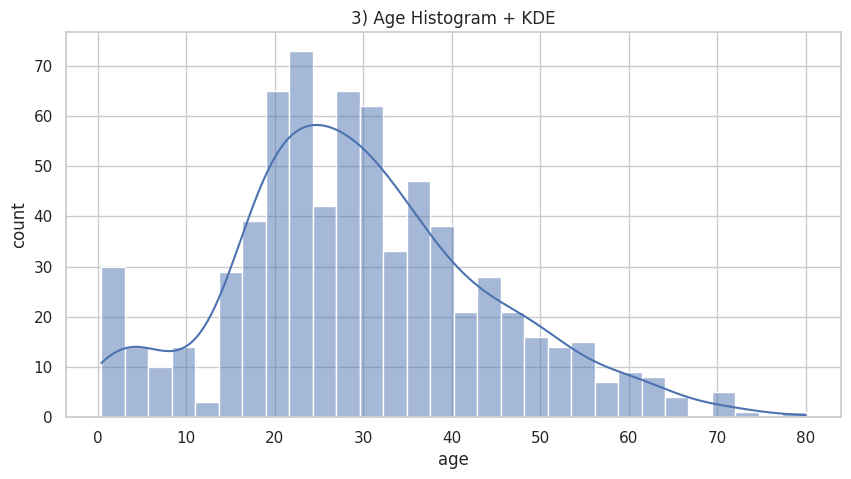

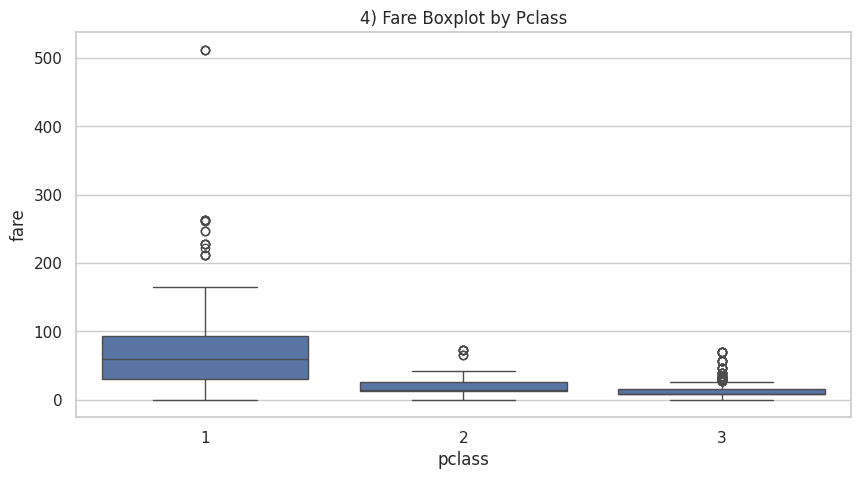


4) Fare outliers саны (IQR): 116


,pclass,fare,sex,age,survived
1,1,71.2833,female,38.0,1
27,1,263.0000,male,19.0,0
31,1,146.5208,female,NaN,1
34,1,82.1708,male,28.0,0
52,1,76.7292,female,49.0,1


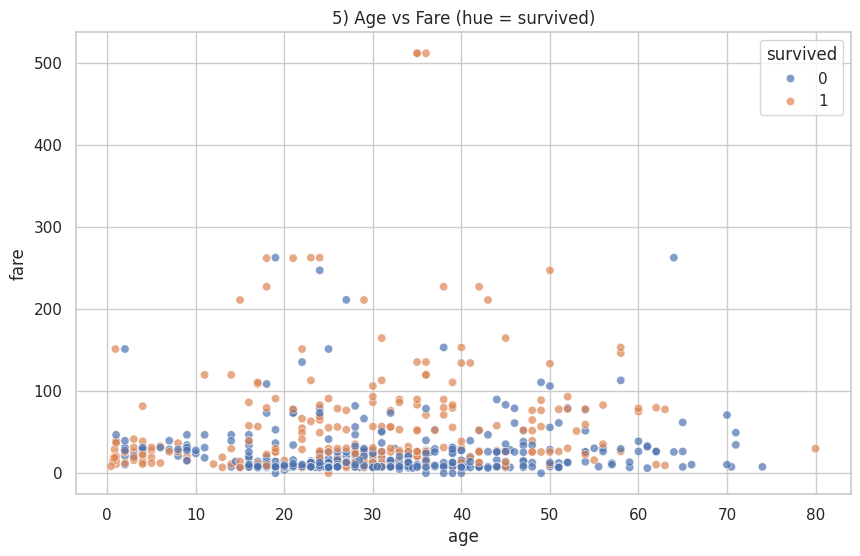

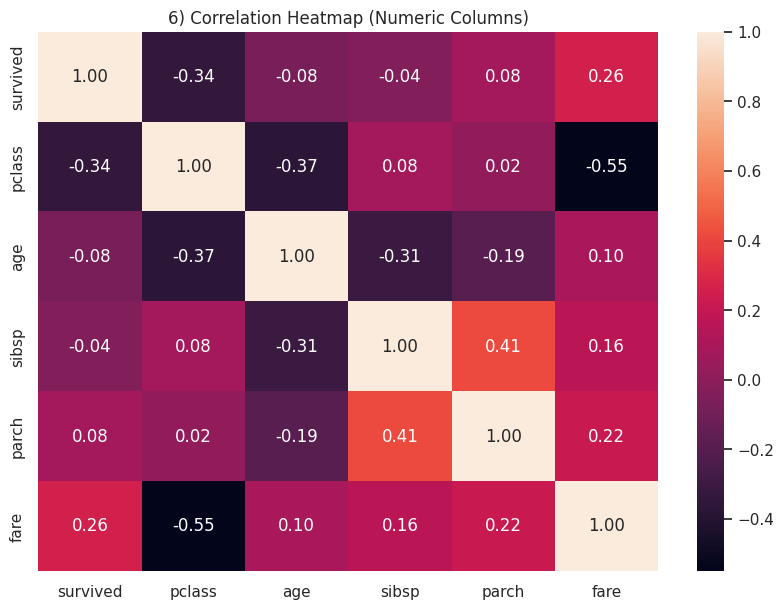


7) Бос мәндер толтырылғаннан кейін:
age         0
embarked    0
dtype: int64

8) sex_le және embarked one-hot бағандары бар үлгі:


,sex,sex_le,embarked_Q,embarked_S
0,male,1,False,True
1,female,0,False,False
2,female,0,False,True
3,female,0,False,True
4,male,1,False,True



9) Жаңа feature-лер:


,age,age_group,sibsp,parch,family_size
0,22.0,adult,1,0,2
1,38.0,adult,1,0,2
2,26.0,adult,0,0,1
3,35.0,adult,1,0,2
4,35.0,adult,0,0,1



10) Age/Fare бастапқы және scaled салыстыру:


,age,age_scaled,fare,fare_scaled
0,22.0,-0.565736,7.2500,-0.502445
1,38.0,0.663861,71.2833,0.786845
2,26.0,-0.258337,7.9250,-0.488854
3,35.0,0.433312,53.1000,0.420730
4,35.0,0.433312,8.0500,-0.486337



11) Fare outliers саны: 116
IQR шектері: (np.float64(-26.724), np.float64(65.6344))


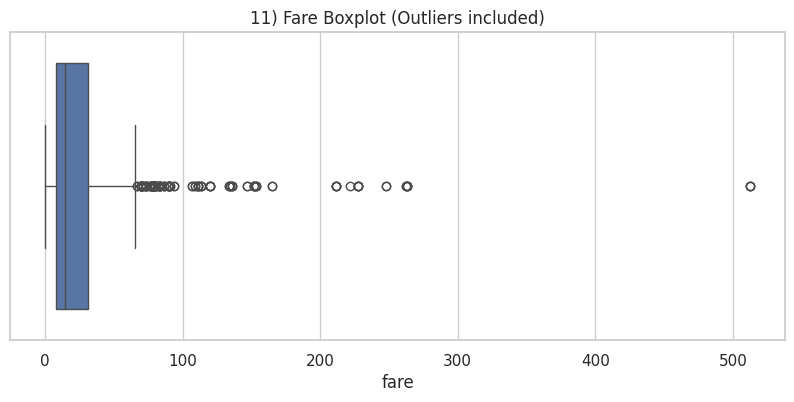

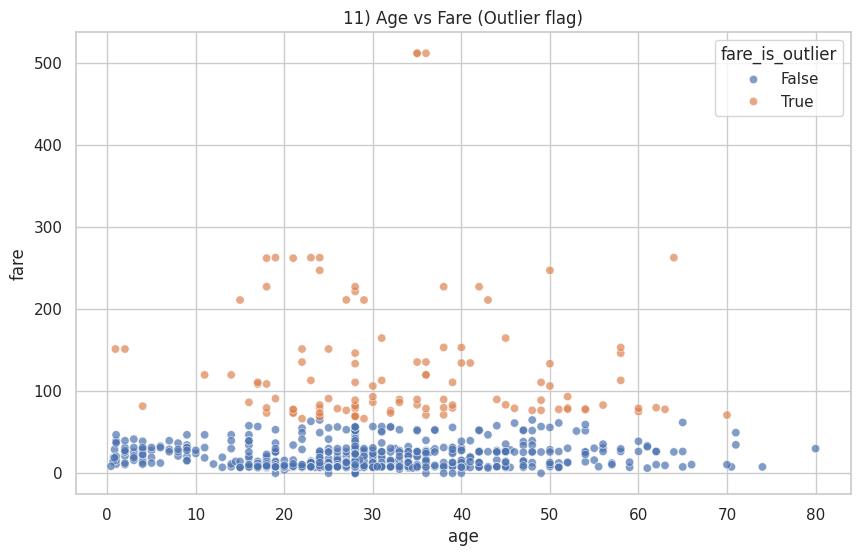


12) Қысқаша қорытындыға қажет негізгі мәліметтер:
- shape: (891, 22)
- missing_values_total: 690
- age_filled_with_median: 28.0
- embarked_filled_with_mode: S
- sex_encoding_classes: ['female', 'male']
- new_features: ['family_size', 'age_group', 'age_scaled', 'fare_scaled', 'fare_is_outlier']
- fare_outliers_count: 116


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,alive,alone,sex_le,embarked_Q,embarked_S,family_size,age_group,age_scaled,fare_scaled,fare_is_outlier
0,0,3,male,22.0,1,0,7.2500,Third,man,True,...,no,False,1,False,True,2,adult,-0.565736,-0.502445,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,...,yes,False,0,False,False,2,adult,0.663861,0.786845,True
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,...,yes,True,0,False,True,1,adult,-0.258337,-0.488854,False
3,1,1,female,35.0,1,0,53.1000,First,woman,False,...,yes,False,0,False,True,2,adult,0.433312,0.420730,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,...,no,True,1,False,True,1,adult,0.433312,-0.486337,False


In [1]:

# ==========================================
# Практикалық тапсырмалар (EDA) — Titanic
# Google Colab-қа дайын толық код
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ------------------------------
# 1) Деректерді жүктеу
# ------------------------------
df = sns.load_dataset("titanic")

print("1) Деректер өлшемі (shape):", df.shape)
print("\nБағандар (columns):")
print(df.columns)

print("\nӘр бағандағы бос мәндер саны:")
print(df.isnull().sum())

display(df.head())


# ------------------------------
# 2) Сандық бағандарды сипаттау (age, fare)
# ------------------------------
print("\n2) age және fare статистикасы:")
stats = df[["age", "fare"]].agg(["mean", "min", "max", "std"])
display(stats)


# ------------------------------
# 3) Гистограмма (age) + KDE
# ------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title("3) Age Histogram + KDE")
plt.xlabel("age")
plt.ylabel("count")
plt.show()


# ------------------------------
# 4) Boxplot: pclass бойынша fare
# ------------------------------
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="pclass", y="fare")
plt.title("4) Fare Boxplot by Pclass")
plt.xlabel("pclass")
plt.ylabel("fare")
plt.show()

# Ауытқулар (outliers) – IQR арқылы (жалпы fare бойынша)
fare_clean = df["fare"].dropna()
Q1 = fare_clean.quantile(0.25)
Q3 = fare_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_fare = df[(df["fare"] < lower_bound) | (df["fare"] > upper_bound)]
print("\n4) Fare outliers саны (IQR):", outliers_fare.shape[0])
display(outliers_fare[["pclass", "fare", "sex", "age", "survived"]].head())


# ------------------------------
# 5) Scatter plot: age vs fare, hue=survived
# ------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="fare", hue="survived", alpha=0.7)
plt.title("5) Age vs Fare (hue = survived)")
plt.xlabel("age")
plt.ylabel("fare")
plt.show()


# ------------------------------
# 6) Heatmap: сандық бағандар корреляциясы
# ------------------------------
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("6) Correlation Heatmap (Numeric Columns)")
plt.show()


# ------------------------------
# 7) Бос мәндерді өңдеу
# age -> медиана, embarked -> mode
# ------------------------------
df_clean = df.copy()

age_median = df_clean["age"].median()
df_clean["age"] = df_clean["age"].fillna(age_median)

emb_mode = df_clean["embarked"].mode()[0]
df_clean["embarked"] = df_clean["embarked"].fillna(emb_mode)

print("\n7) Бос мәндер толтырылғаннан кейін:")
print(df_clean[["age", "embarked"]].isnull().sum())


# ------------------------------
# 8) Кодтау (sex LabelEncoder, embarked One-Hot)
# ------------------------------
le = LabelEncoder()
df_clean["sex_le"] = le.fit_transform(df_clean["sex"])

df_encoded = pd.get_dummies(df_clean, columns=["embarked"], drop_first=True)

print("\n8) sex_le және embarked one-hot бағандары бар үлгі:")
display(df_encoded[["sex", "sex_le"] + [c for c in df_encoded.columns if c.startswith("embarked_")]].head())


# ------------------------------
# 9) Feature Engineering
# family_size және age_group
# ------------------------------
df_encoded["family_size"] = df_encoded["sibsp"] + df_encoded["parch"] + 1

def age_to_group(a):
    if 0 <= a <= 12:
        return "child"
    elif 13 <= a <= 18:
        return "teen"
    elif 19 <= a <= 60:
        return "adult"
    elif 61 <= a <= 100:
        return "senior"
    else:
        return np.nan

df_encoded["age_group"] = df_encoded["age"].apply(age_to_group)

print("\n9) Жаңа feature-лер:")
display(df_encoded[["age", "age_group", "sibsp", "parch", "family_size"]].head())


# ------------------------------
# 10) Масштабтау: age және fare (StandardScaler)
# scaled бағандар қосу, бастапқымен қатар салыстыру
# ------------------------------
scaler = StandardScaler()

df_encoded[["age_scaled", "fare_scaled"]] = scaler.fit_transform(df_encoded[["age", "fare"]])

print("\n10) Age/Fare бастапқы және scaled салыстыру:")
display(df_encoded[["age", "age_scaled", "fare", "fare_scaled"]].head())


# ------------------------------
# 11) Fare outliers анықтау (IQR) және көрсету
# ------------------------------
fare_vals = df_encoded["fare"].dropna()
Q1 = fare_vals.quantile(0.25)
Q3 = fare_vals.quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

df_encoded["fare_is_outlier"] = (df_encoded["fare"] < lb) | (df_encoded["fare"] > ub)

print("\n11) Fare outliers саны:", int(df_encoded["fare_is_outlier"].sum()))
print("IQR шектері:", (lb, ub))

# Boxplot арқылы
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_encoded["fare"])
plt.title("11) Fare Boxplot (Outliers included)")
plt.show()

# Scatter арқылы (age vs fare, outlier белгісімен)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_encoded,
    x="age",
    y="fare",
    hue="fare_is_outlier",
    alpha=0.7
)
plt.title("11) Age vs Fare (Outlier flag)")
plt.show()


# ------------------------------
# 12) EDA қорытындысы (қысқаша мәтінге дерек)
# ------------------------------
print("\n12) Қысқаша қорытындыға қажет негізгі мәліметтер:")

summary = {
    "shape": df_encoded.shape,
    "missing_values_total": int(df_encoded.isnull().sum().sum()),
    "age_filled_with_median": float(age_median),
    "embarked_filled_with_mode": str(emb_mode),
    "sex_encoding_classes": list(le.classes_),
    "new_features": ["family_size", "age_group", "age_scaled", "fare_scaled", "fare_is_outlier"],
    "fare_outliers_count": int(df_encoded["fare_is_outlier"].sum())
}

for k, v in summary.items():
    print(f"- {k}: {v}")

display(df_encoded.head())